# Housing Price Estimation using SVM, Random Forest, Gradient Boosting

In this tutorial, you will learn how to develop a regression model to estimate the house prices in Boston area using Linear Regression, Support Vector Machine, Random Forest, and Gradient Boosting models.

Regular training approach will use full feature set to estimate the final price of the houses. However, an alternative approach will extract the important features out of the full feature set and train the regression models on the stripped-down feature set.

Moreover, performance of the models trained using both the approaches will be compared in terms of Minimum Absolute Error, Minimum Squared Error, and R2 Score.

# Boston Housing Dataset
Housing dataset comprises of information about housing values in the suburbs of Boston. There are total of 506 instances with each instance specifying 13 continuous attributes (including the output attribute “MEDV”) and 1 binary-valued attribute.

Each instance quantifies a cumulative feature of the Boston suburb and the Median Value (MEDV) of the owner-occupied homes in the suburb. We will use the input attributes of this dataset to train the regression models, and then predict the prices of the houses using the trained models:

# Input Features
- CRIM: Per capita crime rate by town
- ZN: Proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS: Proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: Nitric Oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: Proportion of owner-occupied units built prior to 1940
- DIS: Weighted distances to five Boston employment centres
- RAD: Index of accessibility to radial highways
- TAX: Full-value property-tax rate per $10,000
- PTRATIO: Pupil-teacher ratio by town
- B: 1000(Bk – 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT: Percent lower status of the population

# Data Reading and Exploratory Analysis
Let’s first import all python-based libraries necessary to read the data, process it, and then perform further exploratory analysis on it:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

In [2]:
	
%matplotlib inline

In [3]:
file_path = "D:\Data Science\Kaggle datasets\_boston.csv"

In [4]:
df = pd.read_csv(file_path)

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [6]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [8]:
# Check null values
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [9]:
# Types of data in each column
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [10]:
# Now convert the datatype of each attribute to uniform datatype i.e., ‘float32’:
df = df.astype('float32')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float32
 1   ZN       506 non-null    float32
 2   INDUS    506 non-null    float32
 3   CHAS     506 non-null    float32
 4   NOX      506 non-null    float32
 5   RM       506 non-null    float32
 6   AGE      506 non-null    float32
 7   DIS      506 non-null    float32
 8   RAD      506 non-null    float32
 9   TAX      506 non-null    float32
 10  PTRATIO  506 non-null    float32
 11  B        506 non-null    float32
 12  LSTAT    506 non-null    float32
 13  MEDV     506 non-null    float32
dtypes: float32(14)
memory usage: 27.8 KB


In [11]:
# Find the ‘input’ features which form the best correlation with the ‘output’ variable:
data_corr = df.corr()
data_corr['MEDV']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

It seems like ‘LSTAT, ‘PTRATIO, ‘TAX’, ‘NOX’ and ‘INDUS’ negatively impact the housing prices, whereas ‘RM’ depicts the positive correlation with the ‘MEDV’ value.

Now draw a pair plot for all the input features and try to spot any more patterns among the data:

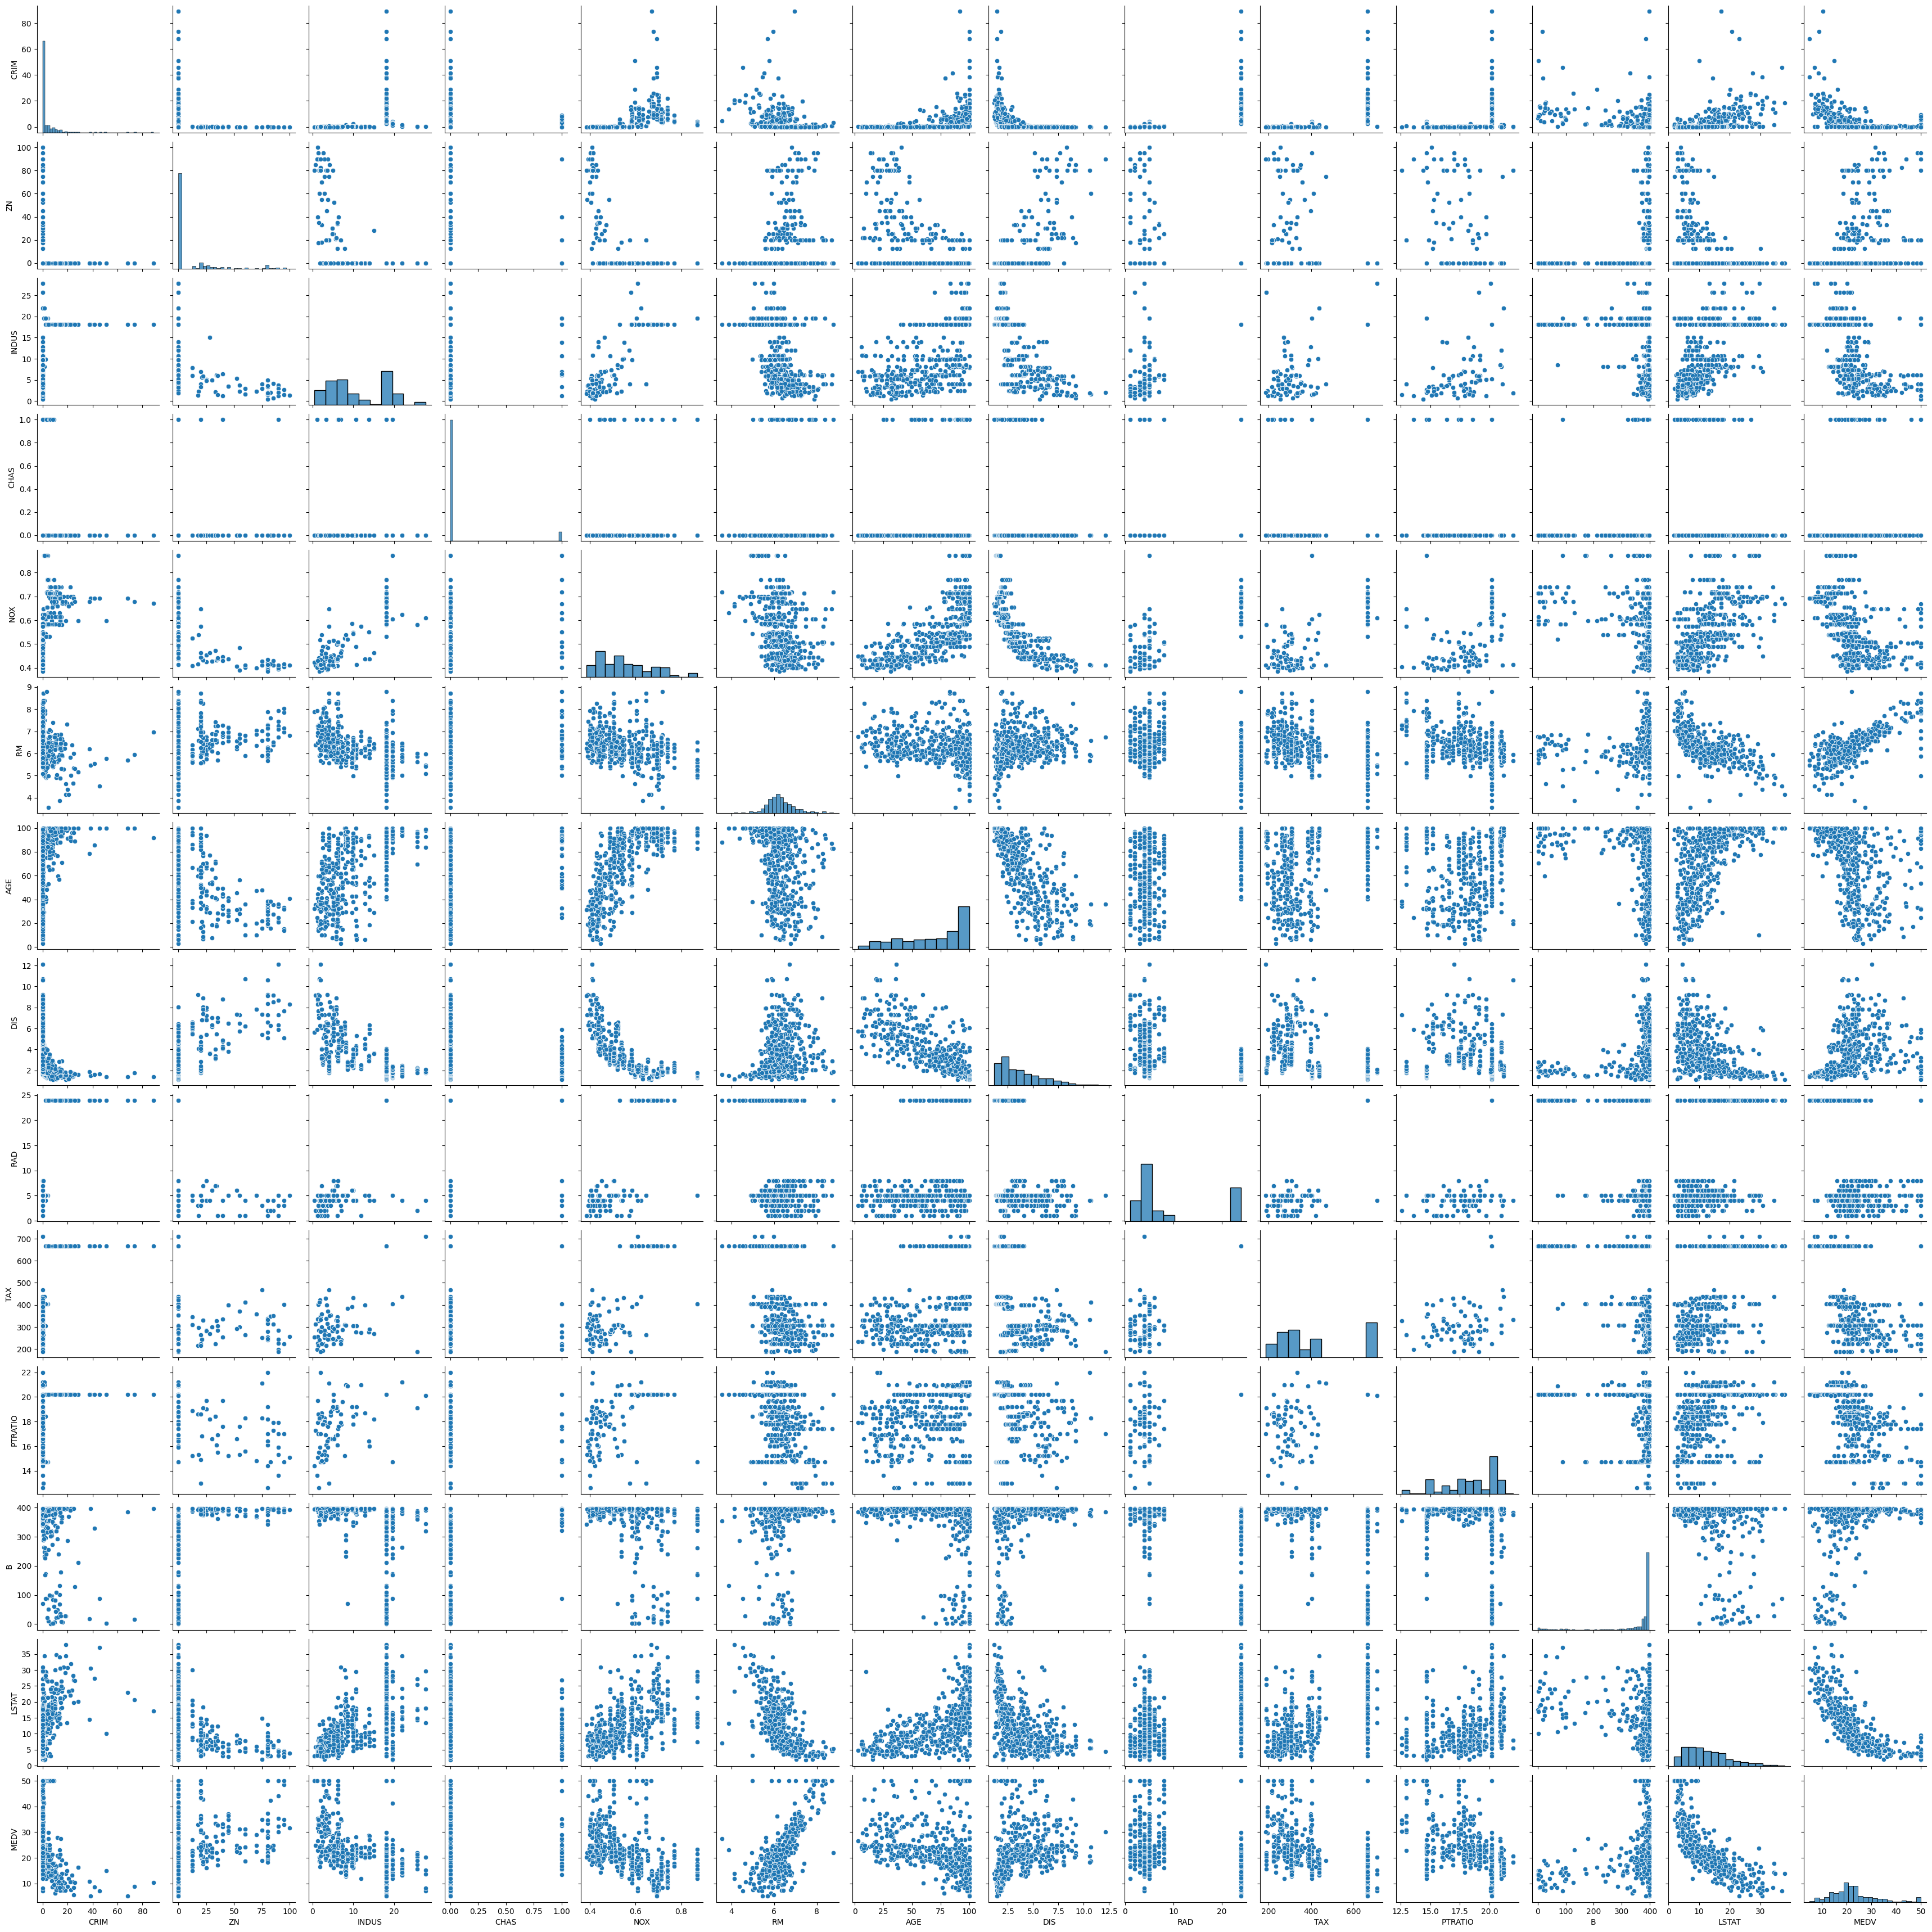

In [12]:
# Pair Plot to visualize the correlation between the features
sns.pairplot(df)

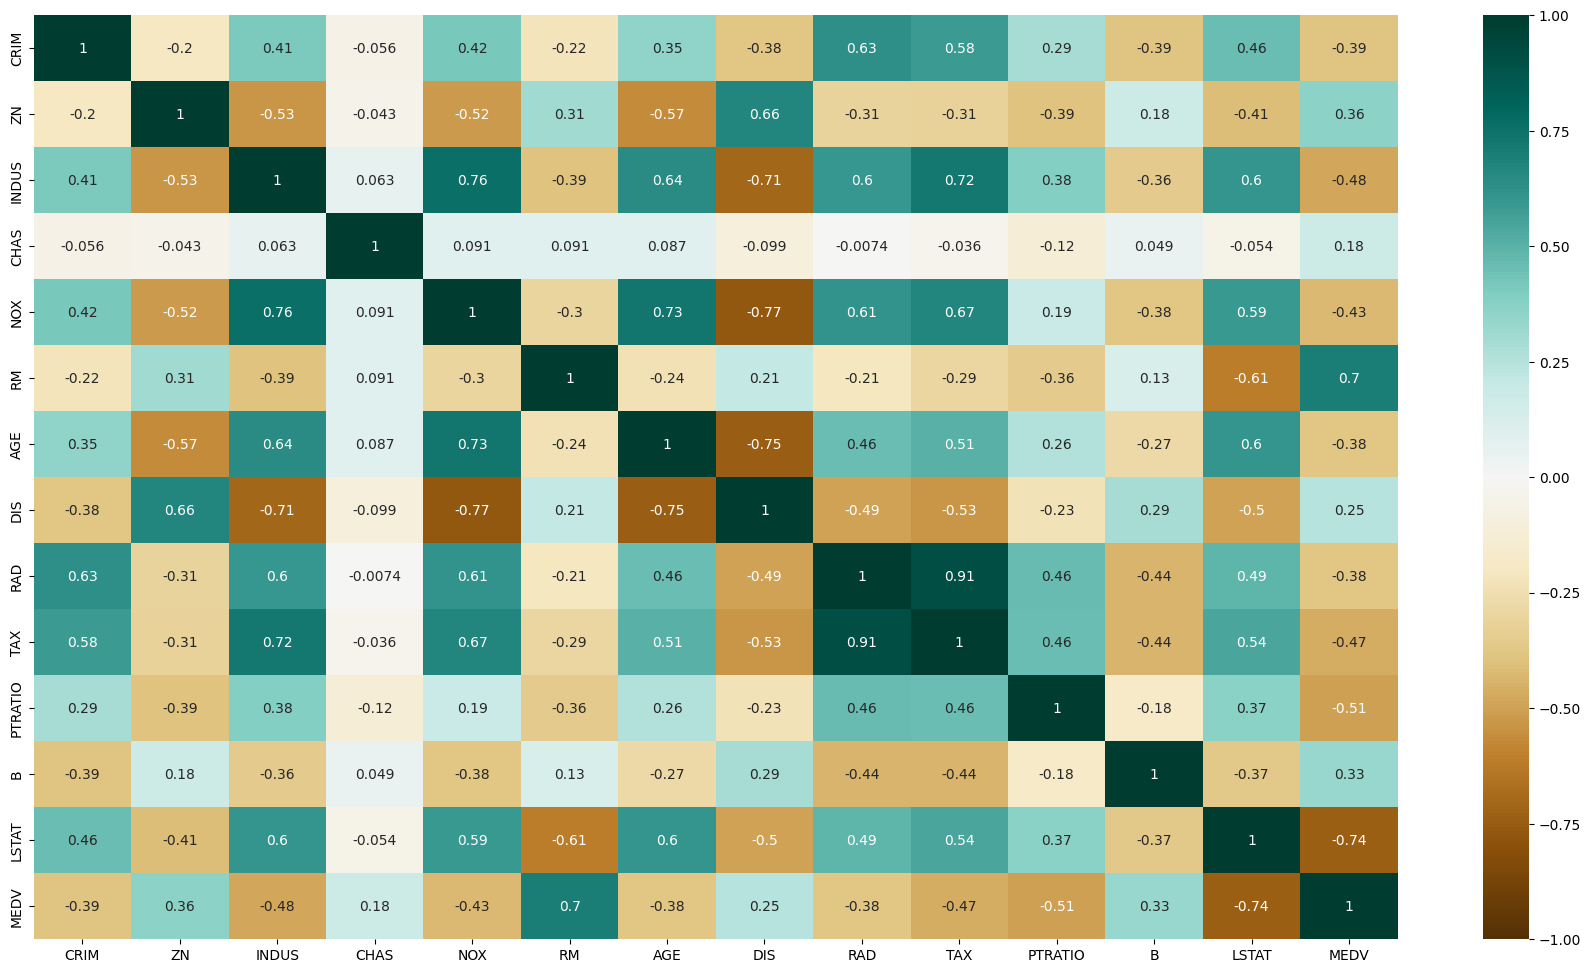

In [13]:
# look at the numeric correlation values between each numeric feature using SNS heatmap:
plt.figure(figsize=(22,12))
sns.heatmap(data_corr, vmax=1, vmin=-1, annot=True, cmap='BrBG')
plt.show()

Looking at the SNS heatmap and the pairplot, we can easily spot the following patterns in the data set:

More accessibility to radial highways (RAD) and tax rate (TAX) resulted in more per capita crime rate (CRIM):

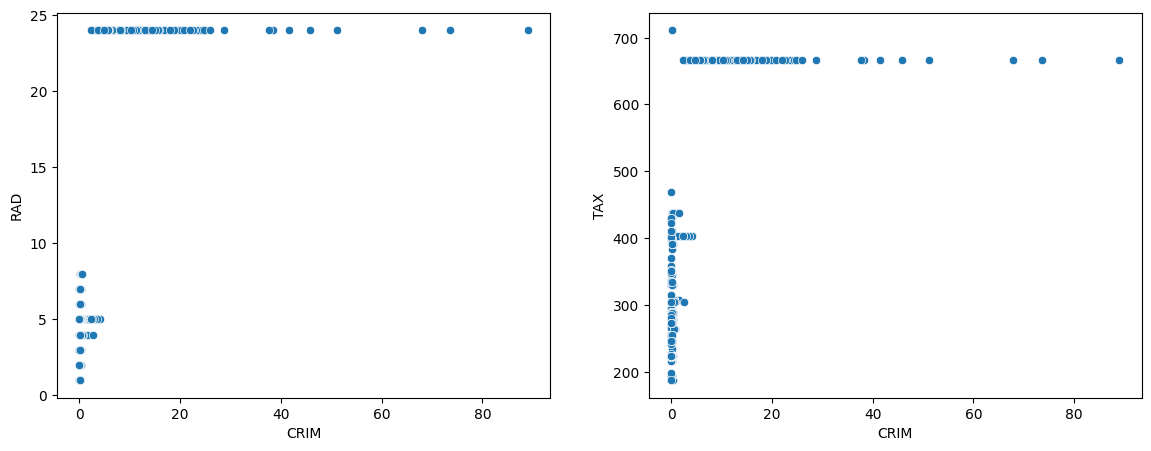

In [14]:
fig, axes = plt.subplots(1, 2, sharex = True, figsize=(14, 5))
sns.scatterplot(data=df, x='CRIM', y='RAD', ax=axes[0])
sns.scatterplot(data=df, x='CRIM', y='TAX', ax=axes[1])
plt.show()

More proportion of residential land zones (ZN) resulted in less non-retail business acres (INDUS), Nitric oxides concentration (NOX), and owner-occupied houses (AGE) which is really a cause-and-effect scenario. Moreover, less proportion of residential land resulted in less distances to Boston employment centers:

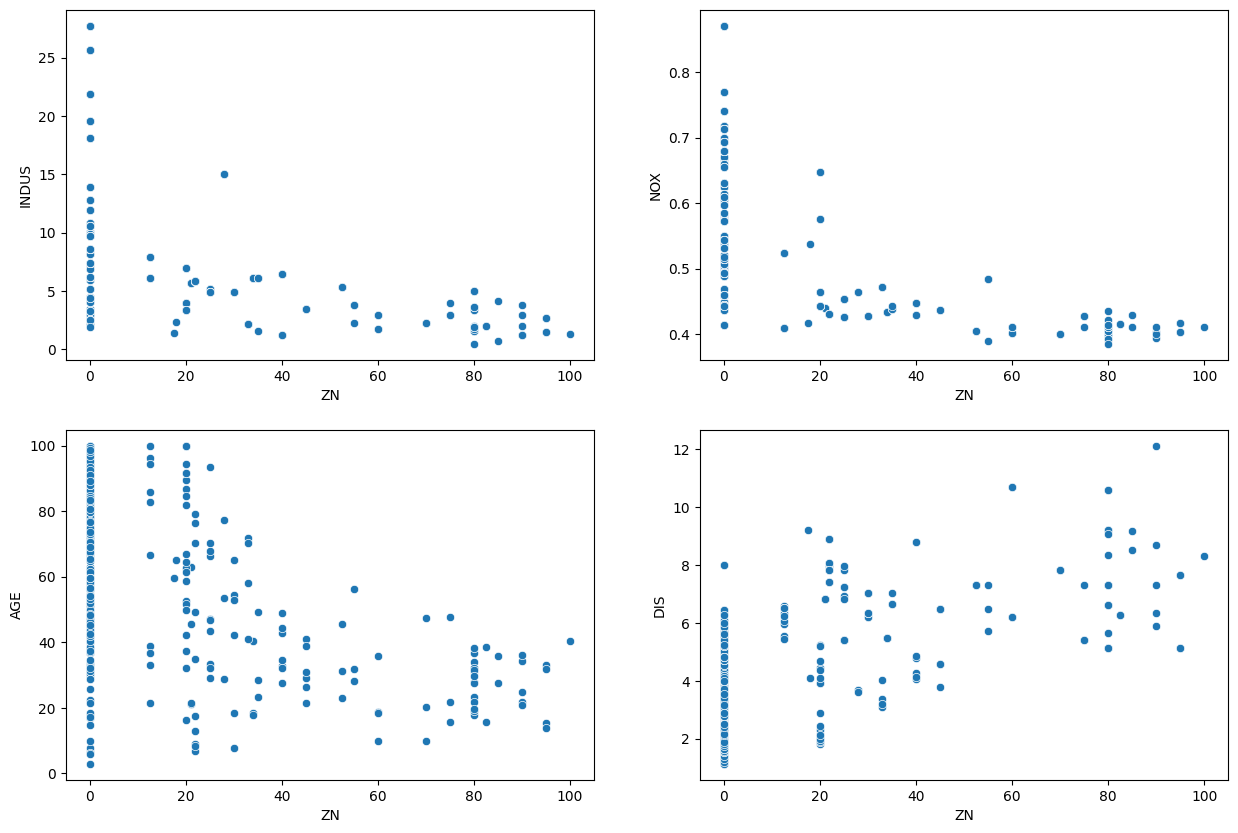

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.scatterplot(data=df, x='ZN', y='INDUS', ax=axes[0, 0])
sns.scatterplot(data=df, x='ZN', y='NOX', ax=axes[0, 1])
sns.scatterplot(data=df, x='ZN', y='AGE', ax=axes[1, 0])
sns.scatterplot(data=df, x='ZN', y='DIS', ax=axes[1, 1])
plt.show()

More proportion of non-retail business acres (INDUS) had the effect of increasing Nitric Oxide concentration (NOX), owner-occupied houses (AGE), accessibility to radial highways (RAD), tax rate (TAX), and percentage of population having low status (LSTAT). Besides, more non-retail business acres resulted in a decreased distance to major Boston employment centers which is a cause-and-effect scenario as people will seek employments in the nearby businesses:


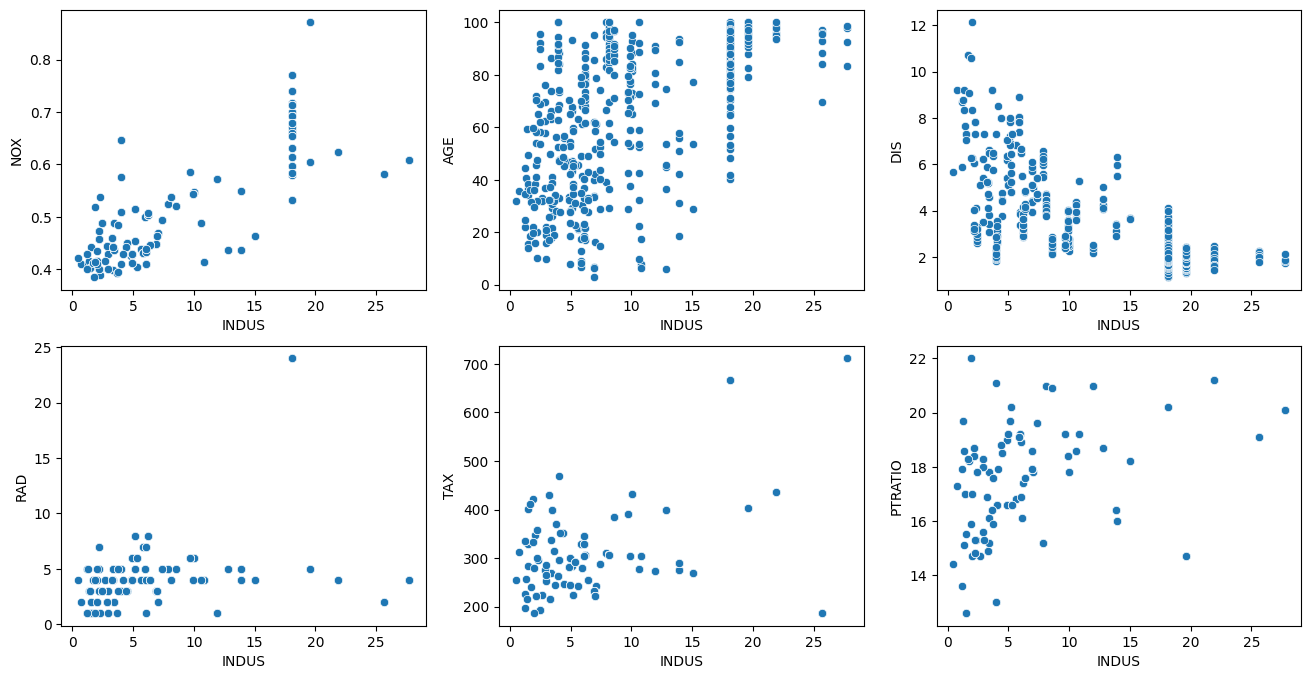

In [16]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8))
sns.scatterplot(data=df, x='INDUS', y='NOX', ax=axes[0, 0])
sns.scatterplot(data=df, x='INDUS', y='AGE', ax=axes[0, 1])
sns.scatterplot(data=df, x='INDUS', y='DIS', ax=axes[0, 2])
sns.scatterplot(data=df, x='INDUS', y='RAD', ax=axes[1, 0])
sns.scatterplot(data=df, x='INDUS', y='TAX', ax=axes[1, 1])
sns.scatterplot(data=df, x='INDUS', y='PTRATIO', ax=axes[1, 2])
plt.show()

More owner-occupied houses (AGE), accessibility to radial highways (RAD), and tax rate (TAX) ultimately resulted in more nitric oxide concentration (NOX) in the area. Also, the increasing distance to Boston employment centers (DIS) seemed to decrease the nitric oxide concentration:

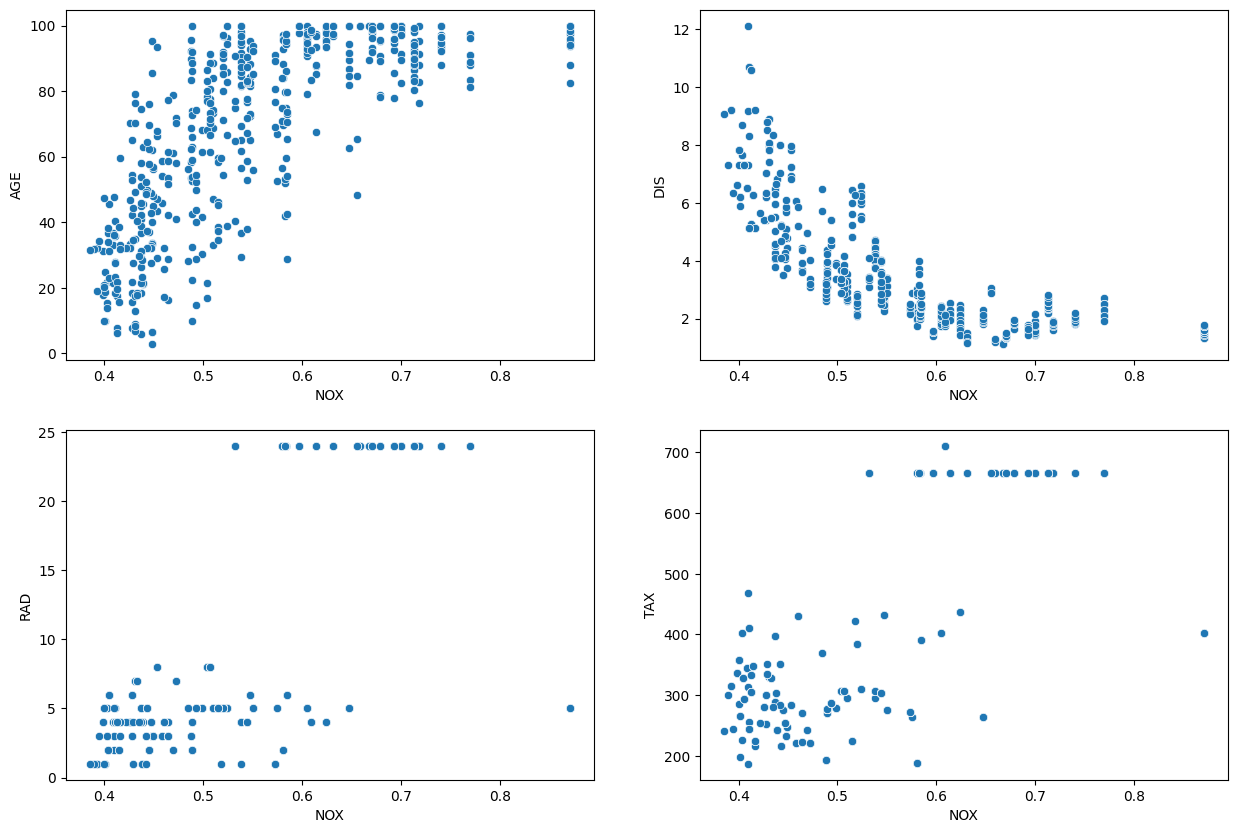

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.scatterplot(data=df, x='NOX', y='AGE', ax=axes[0, 0])
sns.scatterplot(data=df, x='NOX', y='DIS', ax=axes[0, 1])
sns.scatterplot(data=df, x='NOX', y='RAD', ax=axes[1, 0])
sns.scatterplot(data=df, x='NOX', y='TAX', ax=axes[1, 1])
plt.show()

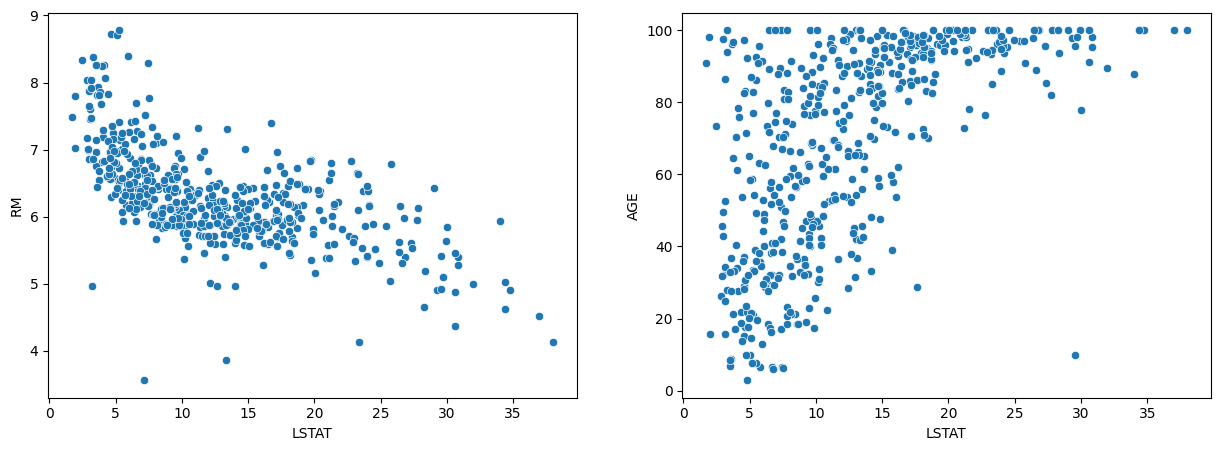

In [18]:
fig, axes = plt.subplots(1, 2, sharex = True, figsize=(15, 5))
sns.scatterplot(data=df, x='LSTAT', y='RM', ax=axes[0])
sns.scatterplot(data=df, x='LSTAT', y='AGE', ax=axes[1])
plt.show()

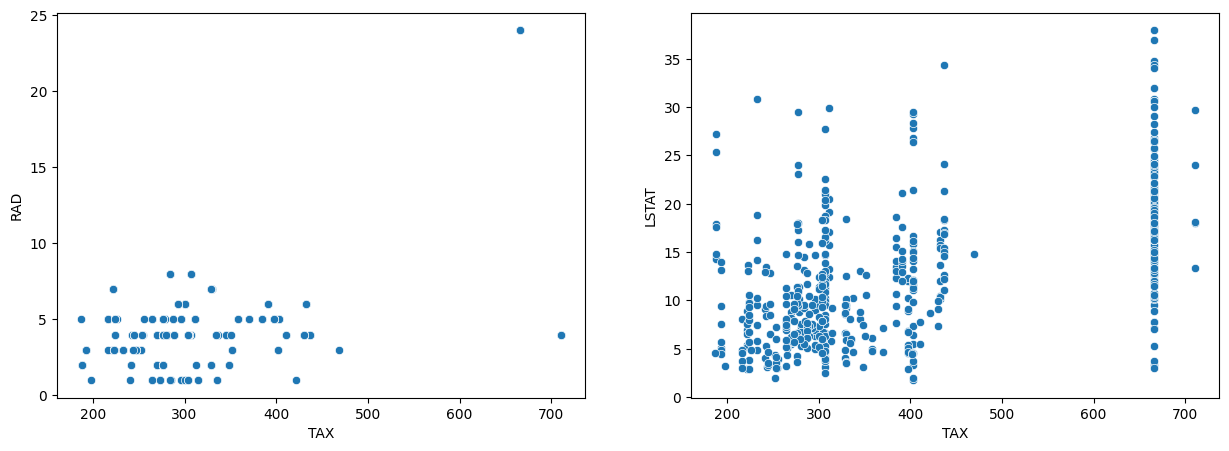

In [19]:
fig, axes = plt.subplots(1, 2, sharex = True, figsize=(15, 5))
sns.scatterplot(data=df, x='TAX', y='RAD', ax=axes[0])
sns.scatterplot(data=df, x='TAX', y='LSTAT', ax=axes[1])
plt.show()

If you can identify more patterns in the data set, do not hesitate to comment and let others know.

Let’s now explore the relation between median price of homes (MEDV) and more correlated attributes in the housing data set:

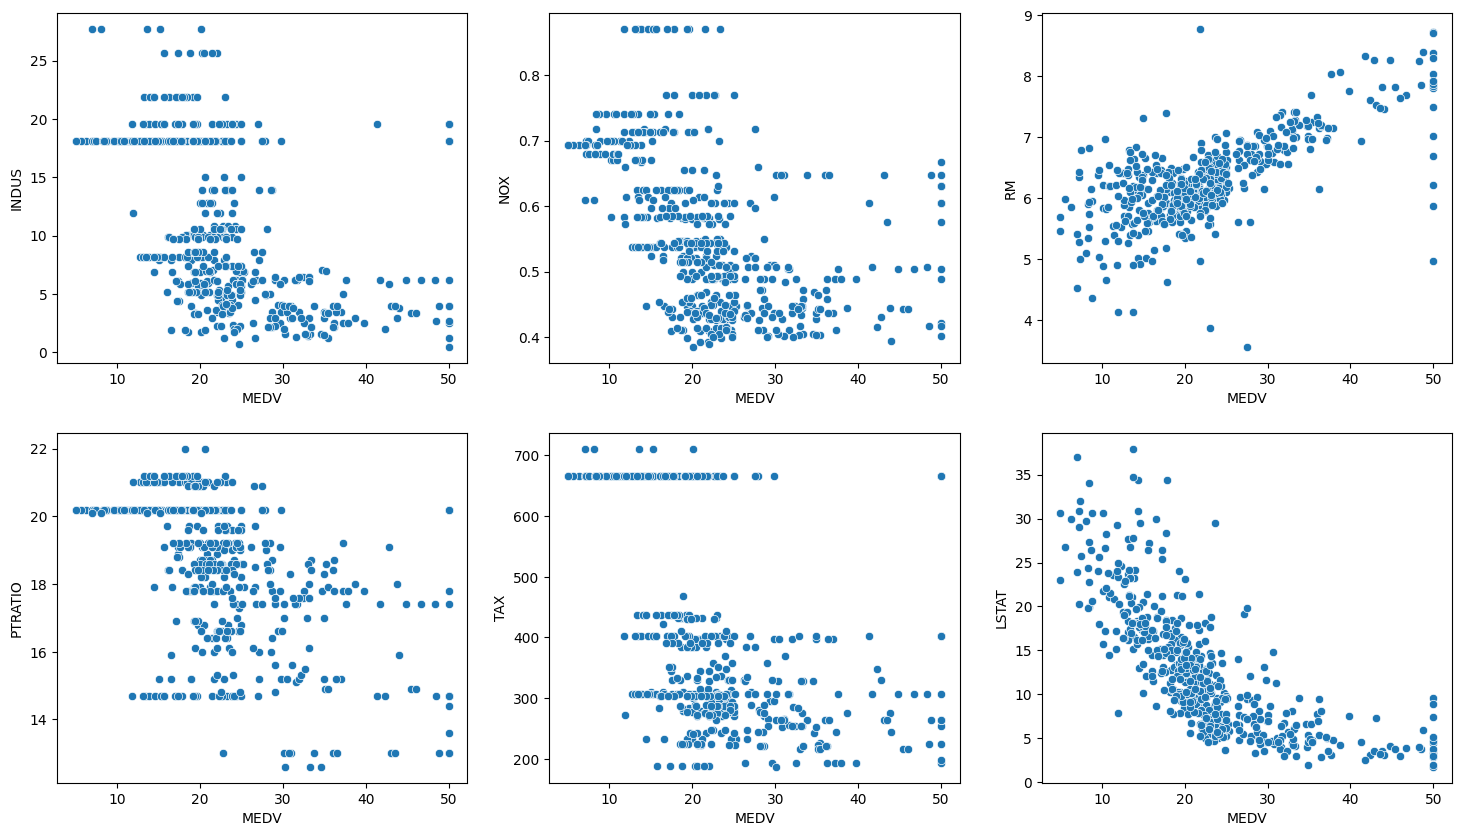

In [20]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
sns.scatterplot(data=df, x='MEDV', y='INDUS', ax=axes[0, 0])
sns.scatterplot(data=df, x='MEDV', y='NOX', ax=axes[0, 1])
sns.scatterplot(data=df, x='MEDV', y='RM', ax=axes[0, 2])
sns.scatterplot(data=df, x='MEDV', y='PTRATIO', ax=axes[1, 0])
sns.scatterplot(data=df, x='MEDV', y='TAX', ax=axes[1, 1])
sns.scatterplot(data=df, x='MEDV', y='LSTAT', ax=axes[1, 2])
plt.show()

Now since we are done with the exploratory data analysis and found some useful insights into the housing data, let’s do some pre-processing on the data before we can actually train the algorithms to predict the house prices…

# Data Pre-processing
Firstly, differentiate the ‘input features’ from the ‘output feature’:

In [21]:
data_X = df.drop('MEDV', axis=1)
data_y = df['MEDV']

Split the dataset into Training Data (80%) and Testing Data (20%). Training data will be used by the models for training purpose, whereas Testing Data will be used to gauge the performance of the trained models on the unseen data.



In [22]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.2, random_state=0)

Since the input features are numeric and differ in individual scales, they need to be scaled such that the distribution of each feature will have mean=0, and std=1.

StandardScaler() is the industry’s go-to algorithm to perform such scaling, which in-turn, enhances the training capability of the mathematical machine learning models as they need to evaluate each feature having the approx. same distribution.

In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

We only need to fit the StandardScaler() on the Training Data and not the Testing Data, since the fitting of scaler on the Testing Data will lead to data leakage.

# Important Features of Housing Dataset
After training the models on the full feature set, we will train the models on the selected feature set and compare the performance of both the trained models. This will give us an idea whether we can achieve the comparable performance using a limited number of features.

Using a limited number of features to train a learning model has the advantage of consuming less training time as well as the computation resources.

The correlation of each feature with the target attribute i.e., MEDV will help us select the most important features:

In [24]:
target_corr = data_corr['MEDV']
target_corr

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

In [25]:
imp_features = target_corr.index[abs(target_corr) > 0.4]
imp_features = imp_features[imp_features != 'MEDV']
print(imp_features)

Index(['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT'], dtype='object')


In [26]:
data_X_imp = data_X[imp_features]
data_y_imp = data_y
X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(data_X_imp, data_y_imp, test_size=0.2, random_state=0)

# Regression Modelling Performance Parameters
The performance of the regression model can be evaluated in terms of Mean Absolute Error (MAE), Mean Squared Error (MSE) or R-Squared(R2) Score.

Mean Absolute Error represents the mean of absolute error between the original values and the values predicted from the model. So, the lower the MAE, the better.

Mean Squared Error depicts the mean of square of the error between the original values and the predictions from the model. So, we should aim for a lower MSE value.

R-Squared represents the proportion of the variance in the dependent variable that is predictable from the independent variable. So, R2 value must be as close to ‘1’ as possible

# Regression Modelling using Linear/Ridge Regression
To train the linear and ridge regression models on the housing dataset, we need to employ these from scikit-learn library. We will firstly train and evaluate the models on the full feature set and then on the important feature set.

# Full Feature Set
### Linear Regression
To train Linear Regression using the full feature set, select the appropriate training data (X_train, y_train) and fit the model as follows:

In [27]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [28]:
# Let’s now evaluate the performance of this Linear Regression model:
y_pred = lr_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)
print(f"Linear Regression Model Performance:\nMAE: {mae}\nMSE: {mse}\nR2 Score: {R2}")

Linear Regression Model Performance:
MAE: 3.842909812927246
MSE: 33.4489860534668
R2 Score: 0.5892223119735718


# Ridge Regression
Ridge regression is a derivative of linear regression, but with L2 regularization. It reduces the model complexity by shrinking the coefficients as per the square of the magnitude of coefficients.

Since the L2 regularization is controlled by a number of hyperparameters, we will do a GridSearch to select the best suite of hyperparameters and then train our model using those parameters:

In [29]:
ridge_model = Ridge()
ridge_param_grid = {'solver': ['svd', 'cholesky', 'lsqr', 'sag'],
                    'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],
                    'fit_intercept': [True, False]
                   }
ridge_cv = KFold(n_splits=5)
ridge_grid = GridSearchCV(ridge_model, ridge_param_grid, cv=ridge_cv, scoring='neg_mean_absolute_error', n_jobs=-1)
ridge_grid.fit(X_train, y_train)

,estimator,Ridge()
,param_grid,"{'alpha': [1e-05, 0.0001, ...], 'fit_intercept': [True, False], 'solver': ['svd', 'cholesky', ...]}"
,scoring,'neg_mean_absolute_error'
,n_jobs,-1
,refit,True
,cv,KFold(n_split...shuffle=False)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,10


In [33]:
# Data Splitting
X = df.drop('MEDV', axis=1)
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge Regression with GridSearchCV
ridge_model = Ridge()
ridge_param_grid = {'solver': ['svd', 'cholesky', 'lsqr', 'sag'],
                    'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],
                    'fit_intercept': [True, False]
                   }
ridge_cv = KFold(n_splits=5)
ridge_grid = GridSearchCV(ridge_model, ridge_param_grid, cv=ridge_cv, scoring='neg_mean_absolute_error', n_jobs=-1)
ridge_grid.fit(X_train, y_train)

print('Ridge Regression Best Params:', ridge_grid.best_params_)
print('Ridge Regression Best Score:', ridge_grid.best_score_)


Ridge Regression Best Params: {'alpha': 0.1, 'fit_intercept': False, 'solver': 'cholesky'}
Ridge Regression Best Score: -3.432737874984741


c:\Users\AL REHMAN LAPTOPS\miniconda3\envs\ex\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.07045e-08): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


# Important Feature Set
## Linear Regression
Select the dataset consisting of important feature set (X_train_imp, y_train_imp) and fit the regression model on that data:

In [34]:
lr_model = LinearRegression()
lr_model.fit(X_train_imp, y_train_imp)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [35]:
# Now evaluate its performance on the testing data:
lr_y_pred = lr_model.predict(X_test_imp)
print('Mean Absolute Error:', mean_absolute_error(y_test_imp, lr_y_pred))
print('Mean Squared Error:', mean_squared_error(y_test_imp, lr_y_pred))
print('R2 Score:', r2_score(y_test_imp, lr_y_pred))

Mean Absolute Error: 4.394505977630615
Mean Squared Error: 42.65200424194336
R2 Score: 0.4762025475502014


## Full Feature Set: 
- MAE – 3.84, MSE – 33.44, R2 – 0.59

## Important Feature Set: 
- MAE – 4.39, MSE – 42.65, R2 – 0.47

# Ridge Regression
Perform the hyperparameter tuning for the Ridge regression, and fit the ridge regression model on the important feature data set with the best parameters in the context of ‘neg_mean_absolute_error’:

In [36]:
ridge_model = Ridge()
ridge_param_grid = {'solver': ['svd', 'cholesky', 'lsqr', 'sag'],
                    'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],
                    'fit_intercept': [True, False]
                   }
ridge_cv = KFold(n_splits=5)
ridge_grid = GridSearchCV(ridge_model, ridge_param_grid, cv=ridge_cv, scoring='neg_mean_absolute_error', n_jobs=-1)
ridge_grid.fit(X_train_imp, y_train_imp)


,estimator,Ridge()
,param_grid,"{'alpha': [1e-05, 0.0001, ...], 'fit_intercept': [True, False], 'solver': ['svd', 'cholesky', ...]}"
,scoring,'neg_mean_absolute_error'
,n_jobs,-1
,refit,True
,cv,KFold(n_split...shuffle=False)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,1e-05


In [37]:
print('Ridge Regression Best Params:', ridge_grid.best_params_)
print('Ridge Regressiton Best Score:', ridge_grid.best_score_)

Ridge Regression Best Params: {'alpha': 1e-05, 'fit_intercept': False, 'solver': 'lsqr'}
Ridge Regressiton Best Score: -3.429526853561401


Now predict the house prices of the test data set and evaluate the performance of the optimized Ridge regression model:

In [38]:
ridge_y_pred = ridge_grid.predict(X_test_imp)
print('Mean Absolute Error:', mean_absolute_error(y_test_imp, ridge_y_pred))
print('Mean Squared Error:', mean_squared_error(y_test_imp, ridge_y_pred))
print('R2 Score:', r2_score(y_test_imp, ridge_y_pred))

Mean Absolute Error: 4.098080635070801
Mean Squared Error: 41.44075393676758
R2 Score: 0.49107760190963745


# Regression Modelling using Support Vector Machine
To train the SVM model on the Housing data set, Support Vector Regressor (SVR) is employed from scikit-learn library.

In [39]:
# At first, SVR() model is fitted on the training data having full features using the default parameters:
SVR_model = SVR()
SVR_model.fit(X_train, y_train)

,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [40]:
# Once the model is trained, we need to predict the performance of the model on the testing data set:
SVR_y_pred = SVR_model.predict(X_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, SVR_y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, SVR_y_pred))
print('R2 Score:', r2_score(y_test, SVR_y_pred))

Mean Absolute Error: 4.530547929158997
Mean Squared Error: 52.8374721866762
R2 Score: 0.2794934484549565


In this alternative approach, we will train the model using a subset of hyperparameters and then select best parameters based on a scoring metric i.e., neg_mean_absolute_error:



In [41]:
svm_param_grid = {'C':[0.01, 0.1, 1, 10, 100],
                'kernel': ['linear', 'rbf'],
                'gamma' :[0.01, 0.1, 1, 10, 100]}
svm_cv = KFold(n_splits=5)
svm_grid = GridSearchCV(SVR(), svm_param_grid, cv=svm_cv, scoring='neg_mean_absolute_error', n_jobs=-1)
svm_grid.fit(X_train, y_train)

,estimator,SVR()
,param_grid,"{'C': [0.01, 0.1, ...], 'gamma': [0.01, 0.1, ...], 'kernel': ['linear', 'rbf']}"
,scoring,'neg_mean_absolute_error'
,n_jobs,-1
,refit,True
,cv,KFold(n_split...shuffle=False)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,kernel,'linear'


‘C’ is the regularization parameter which controls the amount of error in the training data as well as the unseen data. Higher value of ‘C’ leads to less regularization which results in overfitting for training data and vice versa.

‘Kernel’ is selected based on the shape/dimension of the input features.

‘gamma’ decides how much curvature we want in a decision boundary. Higher ‘gamma’ leads to more curvature which results in overfitting and vice versa

SVR() model will be trained using each combination of the hyperparameters specified in ‘svm_param_grid’.

During each iteration, model will be trained using 5-fold cross-validation. 4-folds of the data will be used to train the model, and remaining fold will be used to test the accuracy of the trained model.

Hyperparameters resulting in the maximum accuracy will be used to train the model on the complete dataset in the final stages of ‘GridSearchCV’. We can get the parameters which resulted in the maximum accuracy as follows:

In [42]:
print('SVM Best Params:', svm_grid.best_params_)
print('SVM Best Score:', svm_grid.best_score_)

SVM Best Params: {'C': 1, 'gamma': 0.01, 'kernel': 'linear'}
SVM Best Score: -3.3443549859980815


In [43]:
svm_y_pred = svm_grid.predict(X_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, svm_y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, svm_y_pred))
print('R2 Score:', r2_score(y_test, svm_y_pred))


Mean Absolute Error: 3.151231248716658
Mean Squared Error: 29.864132478731015
R2 Score: 0.592764335297616


In [44]:
# Let’s now train SVR() model on the data set containing important features using the default parameters:
SVR_model_imp = SVR()
SVR_model_imp.fit(X_train_imp, y_train_imp)

,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [48]:
# Instantiate the SVM model
svm_model = SVR()

# Train the model on the imputed training data
svm_model.fit(X_train_imp, y_train_imp)

# Now evaluate the model
svm_y_pred = svm_model.predict(X_test_imp)
print('Mean Absolute Error:', mean_absolute_error(y_test_imp, svm_y_pred))
print('Mean Squared Error:', mean_squared_error(y_test_imp, svm_y_pred))
print('R2 Score:', r2_score(y_test_imp, svm_y_pred))

Mean Absolute Error: 5.50653027623757
Mean Squared Error: 80.77879198713099
R2 Score: 0.007978113586509461


In [49]:
svm_param_grid = {'C':[0.01, 0.1, 1, 10],
                'kernel': ['linear', 'rbf'],
                'gamma' :[0.01, 0.1, 1, 10]}
svm_cv = KFold(n_splits=5)
svm_grid = GridSearchCV(SVR(), svm_param_grid, cv=svm_cv, scoring='neg_mean_absolute_error', n_jobs=-1)
svm_grid.fit(X_train_imp, y_train_imp)

,estimator,SVR()
,param_grid,"{'C': [0.01, 0.1, ...], 'gamma': [0.01, 0.1, ...], 'kernel': ['linear', 'rbf']}"
,scoring,'neg_mean_absolute_error'
,n_jobs,-1
,refit,True
,cv,KFold(n_split...shuffle=False)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,kernel,'rbf'


In [50]:
print('SVM Best Params:', svm_grid.best_params_)
print('SVM Best Score:', svm_grid.best_score_)

SVM Best Params: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
SVM Best Score: -3.113660588140698


In [51]:
svm_y_pred = svm_grid.predict(X_test_imp)
print('Mean Absolute Error:', mean_absolute_error(y_test_imp, svm_y_pred))
print('Mean Squared Error:', mean_squared_error(y_test_imp, svm_y_pred))
print('R2 Score:', r2_score(y_test_imp, svm_y_pred))

Mean Absolute Error: 3.6375910893171888
Mean Squared Error: 35.190144854497014
R2 Score: 0.5678396145453178


## Regression Modelling using Random Forest Regressor
In Random Forest Regressor, a lot of decision tree regressors with sparse feature set and nodes/leaves are trained using the training data set. During the prediction stage, each decision tree in the Random Forest model predicts an output value. The mean of all these values then reported as the final predicted value for each instance in the test data set.

### Full Feature Set
Let’s first train the Random Forest Regressor model using the full feature training data:

In [52]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [53]:
rf_y_pred = rf_model.predict(X_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, rf_y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, rf_y_pred))
print('R2 Score:', r2_score(y_test, rf_y_pred))

Mean Absolute Error: 2.10944122393926
Mean Squared Error: 8.761740183772318
R2 Score: 0.8805224598360835


In [54]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train_imp, y_train_imp)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [55]:
rf_y_pred = rf_model.predict(X_test_imp)
print('Mean Absolute Error:', mean_absolute_error(y_test_imp, rf_y_pred))
print('Mean Squared Error:', mean_squared_error(y_test_imp, rf_y_pred))
print('R2 Score:', r2_score(y_test_imp, rf_y_pred))

Mean Absolute Error: 2.874058827886394
Mean Squared Error: 25.70014168855417
R2 Score: 0.684383705031945


# Regression Modelling using Gradient Boosting Regressor
Gradient Boosting classifier is a combined sequential model of various Decision Trees, where the outcome of one decision tree is used to train the next one and so on.

Let’s train and evaluate the performance of gradient boosting regressor on both the full feature set and the important feature set…

## Full Feature Set

In [56]:
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [57]:
gb_y_pred = gb_model.predict(X_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, gb_y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, gb_y_pred))
print('R2 Score:', r2_score(y_test, gb_y_pred))

Mean Absolute Error: 1.9153397929639906
Mean Squared Error: 6.214087889161845
R2 Score: 0.915262959208203


## Important Feature Set

In [58]:
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train_imp, y_train_imp)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [59]:
gb_y_pred = gb_model.predict(X_test_imp)
print('Mean Absolute Error:', mean_absolute_error(y_test_imp, gb_y_pred))
print('Mean Squared Error:', mean_squared_error(y_test_imp, gb_y_pred))
print('R2 Score:', r2_score(y_test_imp, gb_y_pred))

Mean Absolute Error: 2.9089097423744215
Mean Squared Error: 23.33221516466682
R2 Score: 0.7134635523449562


# Conclusion
We developed regression models to predict the house prices in suburbs of Boston using Linear/Ridge Regression, Support Vector Regressor, Random Forest Regressor and Gradient Boosting Regressor. These regression models helped us estimate the house prices using the numeric input features. Moreover, the models were also trained using the more correlated features of the data set, and their performance was compared with the models developed using the full-fledge feature set.

Gradient Boosting Regressor and Random Forest Regressor were more robust in predicting the house prices even when provided with a limited feature set. These results depicted that robust model could be trained using the important features only, which is a critical requirement to save computation resources as well as the training time.